<center><img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="30%" /></center>

<hr style="height:2px;border:none"/>
<h1 align='center'> INF-398 Aprendizaje Automático </h1>

<H3 align='center'> Tarea/Taller 2 </H3>
<hr style="height:2px;border:none"/>



# Temas

* Regresión Lineal
* Regularización
* Selección de Características
* Reducción de Dimensionalidad


# Reglas & Formalidades

* Pueden trabajar en equipos de 2 a 3 personas. 
* Los equipos deben ser inscritos antes del 10 de Noviembre.
* Pueden reusar código visto en clases y/o recolectar código/ideas de otros sitios, mencionando al autor y entregando un link a la fuente. 
* Si resulta necesaria, la intervención de personas ajenas al grupo (e.g. experto) debe ser declarada y justificada.
* Tener roles dentro del equipo está bien, pero al final del proceso, cada miembro debe entender y estar en condiciones de exponer todo el trabajo realizado. 

# Entregables 




> * **Video:** Se debe preparar un video explicativo de **15 a 20 minutos** donde se describe la metodología utilizada, los resultados obtenidos y las conclusiones de la experiencia. 

> * **Código:** Se debe enviar un jupyter notebook con el código utilizado, de modo que sea posible **reproducir los resultados** presentados. Como alternativa, se puede entregar un link Github con el código fuente, incluyendo instrucciones precisas para ejecutar los experimentos. En cualquier caso (notebook o repo) el código debe estar ordenado y seccionado apropiadamente.

> * **Conformidad Ética:** Se debe incluir una breve declaración ética en que se indique que el trabajo que se está enviando es un trabajo original, desarollado por los autores en conformidad con todas reglas antes mencionadas. Se debe también mencionar brevemente cuál fue la contribución de cada miembro del equipo. La declaración puede ser parte del notebook o estar en un archivo dentro del repo.

> * **Defensa en vivo (video-conferencia):** El día de clases agendado para la discusión del taller, se seleccionarán aleatoriamente algunos equipos que presentarán oralmente su trabajo ante el curso. Los autores serán evaluados considerando la discusión y debate que generen entre sus pares. Los puntos obtenidos (positivos o negativos) se sumarán a la nota final de taller.

# Fechas

> * Defensas: 26 de Noviembre, horario de clases.
> * Fecha de entrega de vídeo: 27 de Noviembre 23:59 Hrs. (1 días después de encuentro).
> * Fecha de entrega de Jupyter (notebook): 26 de Noviembre 08:00 (se pueden hacer actualizaciones hasta el 27 de Noviembre 23:59 Hrs.). 


# Instrucciones

La tarea se divide en dos secciones:



> **1. Pregunta de Investigación**. Para esta parte, los autores deben elegir una hipótesis de investigación y diseñar un procedimiento experimental que permita reunir evidencia en contra o a favor de la misma. Es legítimo tomar una posición *a-priori* en base a lo que han aprendido en el curso, pero es importante analizar críticamente los resultados sin descartar hipótesis alternativas. 

> La metodología debe incluir al menos 3 datasets, de los cuales al menos 2 deben ser reales. Es deseable también que incluyan experimentos controlados sobre dataset sintéticos o semi-sintéticos no triviales diseñados por ustedes. Por ejemplo, para demostrar que un método logra ignorar variables irrelevantes se podrían crear variables "fake" manualmente. Experimentos de este último tipo que se basen en un dataset real contarán como realizados sobre "dataset reales".

> Si no es relevante para la pregunta de investigación y en honor al tiempo, no es necesario llevar a cabo un análisis exploratorio detallado sobre cada dataset utilizado.

>  **2. Desafío Kaggle**. Para esta parte, los autores enfrentarán un desafío en la plataforma Kaggle y serán calificados en base a su posición en el tablero de resultados y el puntaje obtenido.


# Parte 1. Pregunta de Investigación

## 1. Introducción

Para poder comprender mejor la presente investigación es axiomático comprender los siguientes conceptos:

1. Norma $L_{2}$: Conocida también como regularización Ridge, es una penalización que busca reducir de manera proporcional el valor de los coeficientes del modelo, de tal forma que al disminuir estos, se minimice la correlación entre los atributos y obtener una mejor generalización y por ende disminuir el overfitting asociado. 
2. Ruido blanco: Es una perturbación generada a partir de una distribución de probabilidad centrada en 0. 

En la presente investigación se estudirá la diferencia en el rendimiento entre entrenar un modelo utilizando regularización $L_2$ y entrenar un modelo sobre datos a los que se les aplicó un ruido blanco. 

La motivación pricipal de esta investigación es descubrir los efectos que genera el ruido blanco y $L_2$ en la capacidad de generalización de modelos de regresión lineal. Una importancia práctica y evidente, en caso de que la inyección de ruido blanco demuestre un buen resultado, es proponer como un paso de preprocesamiento el agregar ruido blanco a los atributos en función de regularizar los pesos del modelo de una manera más eficiente en comparación a la aplicación de la penalización $L_2$.

## 2. Hipótesis

Sabemos que entrenar un modelo lineal agregando ruido blanco a los atributos es matemáticamente equivalente a usar el regularizador $L_2$. En la práctica sin embargo, el primer método resulta mucho más efectivo. 

## 3. Metodología

La metodología que nos permitirá reunir evidencia para poner a prueba la hipótesis descrita anteriormente es la siguiente:

Para cada dataset, repetir $n$ veces el siguiente procedimiento:

1. Definir un conjunto de entrenamiento y de prueba. Para garantizar reproducibilidad se utiliza el mismo conjunto de entrenamiento y prueba a lo largo de las $n$ iteraciones para cada dataset.
2. Definir un conjunto de entrenamiento ruidoso.
3. Definir un valor $\lambda$ para la regularización.
4. Entrenar el clasificador lineal 1 en el conjunto de entrenamiento ruidoso.
5. Entrenar el clasificador lineal 2 en el conjunto de entrenamiento original utilizando L2 con parámetro $\lambda$.
5. Calcular el error cuadrático medio asociado a cada clasificador.
6. Almacenar ambos errores.

## 4. Simulación computacional

### 4.1 Importación de librerías

In [1]:
import scipy.stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
%matplotlib inline

Trabajaremos con los siguientes tres datasets:

1. [Red Wine Quality](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009): Este conjunto de datos contiene 1599 registros de 11 propiedades físico-químicas que buscan explicar la calidad del vino "Vinho Verde".
2. [Real estate](https://www.kaggle.com/quantbruce/real-estate-price-prediction): Este conjunto de datos contiene 414 registros de 7 características que buscan predecir el valor de bienes de raíces.
3. [Graduate Admission 2](https://www.kaggle.com/mohansacharya/graduate-admissions): Este conjunto de datos contiene 400 registros de 8 características que buscan predecir la probabilidad de admisión a programas de magíster.

In [3]:
wine_quality = pd.read_csv('./datasets/wine_quality.csv')

In [4]:
real_estate = pd.read_csv('./datasets/real_estate.csv')

In [5]:
admission = pd.read_csv('./datasets/admission.csv')

### 4.3 Breve exploración

Mediante el método ``head`` podemos observar una muestra de datos de cada dataset:

In [6]:
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
real_estate.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [8]:
admission.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


En ningún dataset hay presencia de valores NaN:

In [9]:
print(wine_quality.isnull().values.any(),real_estate.isnull().values.any(),admission.isnull().values.any())

False False False


### 4.2 Generación de muestra

A continuación se define el conjunto de features y target a utilizar para cada uno de los datasets:

In [10]:
data = {
            'wine_quality': (['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                              'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                              'pH', 'sulphates', 'alcohol'],'quality'),
             'real_estate': (['No', 'X1 transaction date', 'X2 house age','X3 distance to the nearest MRT station',
                              'X4 number of convenience stores', 'X5 latitude', 'X6 longitude'],
                              'Y house price of unit area'),
             'admission': (['GRE Score', 'TOEFL Score', 'University Rating', 'SOP','LOR ', 'CGPA', 'Research'],
                            'Chance of Admit ')
    }

La función ``add_noise`` es la encargada de aplicar un ruido gaussiano a las columnas ``features`` del dataframe ``dataset``. Aplicaremos un ruido centrado en 0 y con la misma varianza a cada uno de los atributos tal como se indica en (1):

In [11]:
def add_noise(dataset,features,sigma):
    for i,feature in enumerate(features):
        dataset[feature] = dataset[feature].apply(lambda x: x + sigma*np.random.randn())
    return dataset

La función ``generate_sample`` es la encargada de generar los datos de errores indicados en el paso 5 de nuestra metodología:

In [12]:
from sklearn.metrics import mean_squared_error

In [13]:
def generate_sample(datasets,data,x_limits,n=5):
    errors = dict()
    sigma = 2
    for i,(name,dataset) in enumerate(datasets.items()):
        alphas = np.linspace(0,x_limits[i],n)
        training_data = {'sigmas':[],'lambdas':[],'noisy_error':[],'l2_error':[]}  
        # Step 1
        X_train, X_val, y_train, y_val = train_test_split(dataset[data[name][0]],
                                                          dataset[data[name][1]],
                                                          test_size=0.6,
                                                          random_state=21)
        for i in range(n):
            # Step 2
            X_train_noisy = add_noise(X_train.copy(),data[name][0],sigma)
            # Step 3
            alpha = alphas[i]
            # Step 4
            noisy_model = LinearRegression()
            noisy_model = noisy_model.fit(X_train_noisy,y_train)
            # Step 5
            l2_model = Ridge(alpha=alpha)
            l2_model = l2_model.fit(X_train,y_train)
            # Step 6
            noisy_predict = noisy_model.predict(X_val)
            l2_predict = l2_model.predict(X_val)
            noisy_error = mean_squared_error(y_val,noisy_predict)
            l2_error = mean_squared_error(y_val,l2_predict)
            # Step 7
            training_data['sigmas'].append(sigma)
            training_data['lambdas'].append(alpha)
            training_data['noisy_error'].append(noisy_error)
            training_data['l2_error'].append(l2_error)
        errors[name] = training_data
    return errors

In [14]:
datasets_dict = {
             'wine_quality': wine_quality,
             'real_estate': real_estate,
             'admission': admission
            }

A continuación se generan los datos asociados a la simulación computacional:

In [15]:
errors = generate_sample(datasets_dict,data,x_limits=[10000,2000,2000],n=100)

Luego, obtenemos el error promedio por dataset para cada uno de los modelos (noisy y l2):

In [16]:
def get_mean_error_per_dataset(errors,datasets):
    mean_errors = list()
    for dataset in datasets.keys():
        mean_errors.append([np.mean(errors[dataset]['noisy_error']),
                            np.mean(errors[dataset]['l2_error'])])
    return mean_errors

In [17]:
mean_errors = get_mean_error_per_dataset(errors,datasets_dict)

In [18]:
mean_errors

[[0.5826319685217913, 0.5892437400838518],
 [78.71278485200281, 78.96957613779314],
 [0.00595919644294892, 0.0059768887653140436]]

Finalmente, se presentan gráficos en donde se evidencian los valores de $\lambda$ tal que el desempeño entre el modelo con regularización $L_2$ y el modelo con los features ruidosos es igual (la diferencia de sus errores es 0):

In [19]:
def plot_scatter(x,y,title="",figsize=(10,4),xlabel="x",ylabel="y"):
    fig = plt.figure(figsize=figsize)
    ax = plt.axes()
    ax.plot(x,y,'o')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.grid(color='gray', linestyle='solid')
    plt.show()

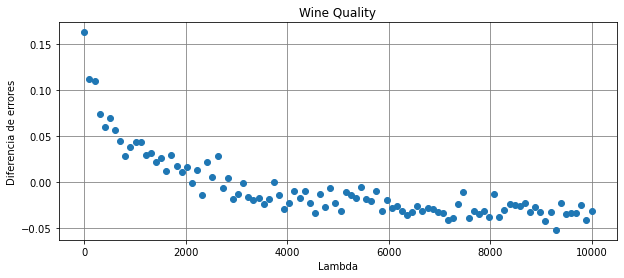

In [20]:
dataset = 'wine_quality'
plot_scatter(errors[dataset]['lambdas'],
             np.array(errors[dataset]['noisy_error']) - np.array(errors[dataset]['l2_error']),
             title="Wine Quality",
             xlabel="Lambda",
             ylabel="Diferencia de errores")

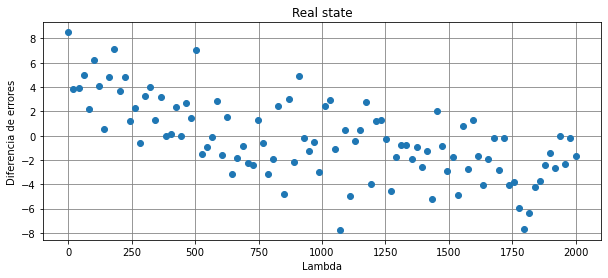

In [21]:
dataset = 'real_estate'
plot_scatter(errors[dataset]['lambdas'],
             np.array(errors[dataset]['noisy_error']) - np.array(errors[dataset]['l2_error']),
             title="Real state",
             xlabel="Lambda",
             ylabel="Diferencia de errores")

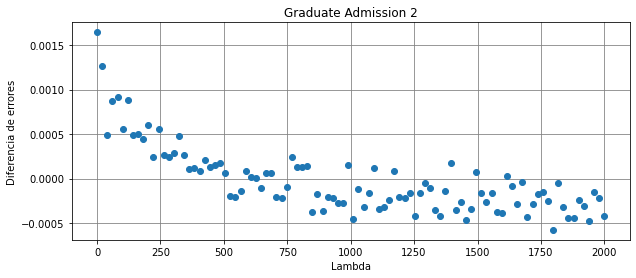

In [22]:
dataset = 'admission'
plot_scatter(errors[dataset]['lambdas'],
             np.array(errors[dataset]['noisy_error']) - np.array(errors[dataset]['l2_error']),
             title="Graduate Admission 2",
             xlabel="Lambda",
             ylabel="Diferencia de errores")

### 4.3 Conclusiones

1. Si bien el modelo entrenado con regularización $L_2$ tiene un MSE mayor para los tres datasets, la diferencia es mínima por lo que el desempeño en promedio es bastante similar.

In [23]:
print([error[0] < error[1] for error in mean_errors])

[True, True, True]


In [24]:
print([error[1] - error[0] for error in mean_errors])

[0.006611771562060498, 0.25679128579032806, 1.7692322365123886e-05]


2. Experimentamente se comprueba lo planteado en (2): en los tres datasets existen valores $\lambda$ tal que la efectividad de los modelos, medida a través del MSE, es igual.

### 4.4 Referencias
1. Bishop CM. Training with Noise is Equivalent to Tikhonov Regularization. Neural Computation 7 No. 1 (1995).

# Parte 2. Desafío Kaggle 

Una de las paradojas más bizarras e interesantes de esta pandemia ha sido la masificación del concepto nómade digital: una persona, generalmente joven, que se pasa la vida viajando y trabajando de manera remota, a veces desde lugares inusuales y paradisíacos. En palabras de la multitud de personas que durante el último año se han sumado a este estilo de vida, la razón es tan simple como envidiable: "Si tenemos que trabajar en línea, ¿porqué no hacerlo desde un país exótico?".  

Para esta parte del taller, tendrán que constuir un modelo capaz de predecir el precio de un paquete de viajes orientado a nómades digitales a partir de una serie de detalles como el destino o itinerario, los hoteles y comidas incluídas, los vuelos involucrados, etc. 

Para acceder a loss detalles del desafío ingrese al siguiente link: https://www.kaggle.com/c/nomades-digitales/



## 1. Importación de librerías

In [ ]:
# Fundamentals
import spacy
import json
import datetime as dt
import re
from scipy import stats

In [ ]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Sklearn
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn import svm
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold

## 2. Descripción Dataset

## 3. Recopilación de datos

In [ ]:
# Import train and test sets
train = pd.read_csv("./datasets/travel_packages_train.csv")
test = pd.read_csv("./datasets/travel_packages_test.csv")

In [ ]:
# Fix columns names
train = train.rename(columns = {"Unnamed: 0": "Index"})
train.columns = train.columns.str.lower().str.replace(' ','_')
test = test.rename(columns = {"Unnamed: 0": "Index"})
test.columns = test.columns.str.lower().str.replace(' ','_')

## 4. Exploración de datos

In [ ]:
train.shape

In [ ]:
# Column names
print(train.columns)

In [ ]:
# Number of uniques values per column
print(train.nunique(axis=0))

## 5 Preprocesamiento de datos

### 5.1 Data Cleaning

In [ ]:
train.isnull().values.any()

In [ ]:
test.isnull().values.any()

In [ ]:
train.head()

### 5.2 Data integration

In [ ]:
# Read file with distances
with open('distances.json', 'r') as fp:
    distancias = json.load(fp)

In [ ]:
# Get average distance between two places
promedio = 0
for origen, destinos in distancias.items():
    
    if(np.isnan(np.nanmean(np.array(list(destinos.values()), dtype=np.float64)))):
        continue
    else:
        promedio = (promedio + np.nanmean(np.array(list(destinos.values()), dtype=np.float64)))/2

for origen, destinos in distancias.items():
    # Distancia promedio del origen a todos los destinos
    for destino, distancia in destinos.items():
        if(distancia == None or np.isnan(distancia)):
            distancias[origen][destino] = promedio
print(promedio)

### 5.3 Data transformation

In [ ]:
# Transform travel_date format to datetime
train['date'] = pd.to_datetime(train['travel_date'])
test['date'] = pd.to_datetime(test['travel_date'])

In [ ]:
# Transform datetime to ordinal representation
train['date'] = train['date'].map(dt.datetime.toordinal)
test['date'] = test['date'].map(dt.datetime.toordinal)

In [ ]:
# Get number of places included in package
train["number_places"] = train.apply(lambda row: len(row.places_covered.split("|")),axis=1)
test["number_places"] = test.apply(lambda row: len(row.places_covered.split("|")),axis=1)

In [ ]:
# Get number of sightseeings (visits to tourist places)
train["number_sightseeing"] = train.apply(lambda row: len(row.sightseeing_places_covered.split("|")),axis=1)
test["number_sightseeing"] = test.apply(lambda row: len(row.sightseeing_places_covered.split("|")),axis=1)

In [ ]:
#train["number_destination"] = train.apply(lambda row: len(row.destination.split("|")),axis=1)
#test["number_destination"] = test.apply(lambda row: len(row.destination.split("|")),axis=1)

In [ ]:
# Encode package type as numbers
package_codes = {'Budget': 1, 'Standard': 2, 'Premium': 3, 'Deluxe': 4,'Luxury':5}
train["package_code"] = train.apply(lambda row: package_codes[row.package_type],axis=1)
test["package_code"] = test.apply(lambda row: package_codes[row.package_type],axis=1)

In [ ]:
# Get meal quality score based on the package
train["meals_score"] = train["meals"] * train["package_code"]
test["meals_score"] = test["meals"] * train["package_code"]

In [ ]:
# Get number of nights
train["nights"] = train.apply(lambda row: sum(map(int,re.findall("(\d+)N",row.itinerary))),axis=1)
test["nights"] = test.apply(lambda row: sum(map(int,re.findall("(\d+)N",row.itinerary))),axis=1)

In [ ]:
# Get number of hotels with spa
train["spa"] = train.apply(lambda row: int("spa" in row.hotel_details.lower()),axis=1)
test["spa"] = test.apply(lambda row: int("spa" in row.hotel_details.lower()),axis=1)

Extraemos las aerolineas presentes en el dataset:

In [ ]:
airline_df = pd.concat([train["airline"],test["airline"]])
airlines = []
for airline in np.unique(airline_df.values):
    airlines_flattened = np.array(airline.split('|')).flatten()
    for airline_flattened in airlines_flattened:
        airlines.append(airline_flattened)
airlines = list(set(airlines))

Se buscó en internet la el precio promedio x km de viaje en cada aerolinea (en USD):

In [ ]:
cost_per_km = {'Qatar Airways': 0.11,
 'Singapore Airlines': 0.11,
 'Sichuan Airlines': 0.13,
 'China Southern': 0.11,
 'Thai Vietjet Air': 0.11,
 'Kenya Airways': 0.2,
 'Air Austral': 0.22,
 'AirAsia X': 0.07,
 'Ethiopian Airlines': 0.14,
 'AirAsia': 0.13,
 'EgyptAir': 0.15,
 'Air Seychelles': 0.15,
 'Malaysia Airlines': 0.13,
 'Airconnect': 0.13,
 'Air India': 0.15,
 'British Airways': 0.2,
 'Kuwait Airways': 0.11,
 'Malindo Air': 0.13,
 'Gulf Air': 0.11,
 'Jetstar Asia': 0.13,
 'Scoot': 0.11,
 'Uzbekistan Airways': 0.13,
 'Philippine Airlines': 0.12,
 'Brussels Airlines': 0.21,
 'Spicejet': 0.14,
 'AirAsia Indonesia': 0.08,
 'Go Air': 0.13,
 'Emirates':0.14,#nan
 'Air India Express': 0.08,
 'Norwegian': 0.17,
 'Swiss': 0.21,
 'Thai Airways': 0.13,
 'Bangkok Airways': 0.31,
 'Lufthansa': 0.22,
 'Cathay Pacific': 0.11,
 'South African Airways': 0.19,
 'Jetstar Airways': 0.13,
 'IndiGo': 0.12,
 'Vistara': 0.13,
 'Oman Air': 0.1,
 'Srilankan Airlines': 0.11,
 'Garuda Indonesia': 0.12,
 'Air Mauritius': 0.17,
 'China Eastern': 0.12,
 'Not Available':0.14,# nan
 'Etihad Airways': 0.1,
 'Qantas Airways': 0.1,
 'Aeroflot': 0.13,
 'Thai AirAsia': 0.18,
 'Silkair': 0.21,
 'Saudia': 0.12,
 'Turkish Airlines': 0.16,
 'Air New Zealand': 0.13,
 'Virgin Atlantic': 0.13,
 'Air Baltic': 0.19,
 'Finnair': 0.1}

Se reemplazaron los valores nan, por el promedio de los valores validos:

In [ ]:
np.nanmean(np.array(list(cost_per_km.values()),dtype=np.float64))

In [ ]:
def count_spa(itinerary, hotel_details, nights):
    try:
        return sum(np.array(list(map(int,re.findall("(\d+)N",itinerary)))) * np.array((list(("spa" in s) for s in hotel_details.lower().split("|")))))
    except:
        return nights/2
def weighted_mean_rate(itinerary, hotel_details):
    itinerario = np.array(list(map(int,re.findall("(\d+)N",itinerary))))
    rates = np.array(list(map(float,re.findall("(\d\.\d)",hotel_details))))
    try:
        return sum(itinerario * rates)/sum(itinerario)
    except:
        return np.mean(rates) if len(rates)>0 else 4.2 # check

Contamos las noches en un hotel con spa (estimado):

In [ ]:
# Get number of nights with spa (estimated sometimes)
train["nights_with_spa"] = train.apply(lambda row: count_spa(row.itinerary, row.hotel_details, row.nights),axis=1)
test["nights_with_spa"] = test.apply(lambda row: count_spa(row.itinerary, row.hotel_details, row.nights),axis=1)

Se obtiene el promedio ponderado de las calificaciones de los hoteles por la cantidad de noches que se está en cada uno:

In [ ]:
# Get hotel quality mean weighted by number of nights in hotels 
train["hotels_score"] = train.apply(lambda row: weighted_mean_rate(row.itinerary, row.hotel_details),axis=1)
test["hotels_score"] = test.apply(lambda row: weighted_mean_rate(row.itinerary, row.hotel_details),axis=1)
train.hotels_score[train.hotels_score == 0] = train["hotels_score"][train["hotels_score"]!=0].mean()
test.hotels_score[test.hotels_score == 0] = train["hotels_score"][train["hotels_score"]!=0].mean()

In [ ]:
train["hotels_score"].describe()

In [ ]:
# Encode start city
train = train.join(pd.get_dummies(train['start_city']))
test = test.join(pd.get_dummies(test['start_city']))

Se utiliza one-hot-encoding para las reglas de cancelación:

In [ ]:
# Encode package of cancellation rules
cancellation_rules_code = dict(zip(train["cancellation_rules"].unique(), ['a','b','c','d','e','f','g','h']))

train["cancellation_rule_package"] = train.apply(lambda row: cancellation_rules_code.get(row.cancellation_rules,"i"),axis=1)
test["cancellation_rule_package"] = test.apply(lambda row: cancellation_rules_code.get(row.cancellation_rules,"i"),axis=1)

train = train.join(pd.get_dummies(train['cancellation_rule_package']))
train["i"] = 0

test = test.join(pd.get_dummies(test['cancellation_rule_package']))
test["e"] = 0
test["g"] = 0

Se obtuvo la distancia entre cada uno de los vuelos con ayuda de la distance matrix API de google maps:

In [ ]:
def total_distance(row, distances):
    destinations = np.append(np.append(row.start_city,np.array(row.destination.split("|"))),row.start_city)
    distance = 0
    distances_list = []
    for i in range(len(destinations)-1):
        current_distance = distances[destinations[i]][destinations[i+1]] if ((destinations[i] in distances and destinations[i+1] in distances[destinations[i]])) else distances[destinations[i+1]][destinations[i]]
        distances_list.append(current_distance)
        distance = distance + current_distance
    return distance

In [ ]:
def cost_por_km(row):
    mean_cost_airlines = np.mean(np.array([cost_per_km[i] for i in row.airline.split("|")],dtype=np.float64))
    return mean_cost_airlines

Se calcula la distancia total en base a todos los lugares visitados, considerando la ciudad de origen

In [ ]:
# Get total distance
train["total_distance"] = train.apply(lambda row: total_distance(row,distancias),axis=1)
test["total_distance"] = test.apply(lambda row: total_distance(row,distancias),axis=1)

In [ ]:
# Get mean cost per km
train["cost_per_km"] = train.apply(lambda row: cost_por_km(row),axis=1)
test["cost_per_km"] = test.apply(lambda row: cost_por_km(row),axis=1)

In [ ]:
# Get mean total cost of airlines
train["cost_airlines"] = train["total_distance"] * train["cost_per_km"]
test["cost_airlines"] = test["total_distance"] * test["cost_per_km"]

In [ ]:
# Get mean total cost of airlines
train["cost_airlines_by_type"] = train["total_distance"] * train["cost_per_km"] * train["package_code"]
test["cost_airlines_by_type"] = test["total_distance"] * test["cost_per_km"] * train["package_code"]

Se codifica la fecha en coordenadas polares para capturar la relación ciclica del año (365 días)

In [ ]:
# Encode the date due to its cyclical nature
train["sin_date"] = train.apply(lambda row: np.sin(2*np.pi*(int(row.travel_date.split("-")[0])+(int(row.travel_date.split("-")[1])*30))/365),axis=1)
train["cos_date"] = train.apply(lambda row: np.cos(2*np.pi*(int(row.travel_date.split("-")[0])+(int(row.travel_date.split("-")[1])*30))/365),axis=1)

test["sin_date"] = test.apply(lambda row: np.sin(2*np.pi*(int(row.travel_date.split("-")[0])+(int(row.travel_date.split("-")[1])*30))/365),axis=1)
test["cos_date"] = test.apply(lambda row: np.cos(2*np.pi*(int(row.travel_date.split("-")[0])+(int(row.travel_date.split("-")[1])*30))/365),axis=1)

### Análisis distribucional

In [ ]:
# Funciones de transformación para conseguir distribuciones normales
def cubo(x):
  return np.power(x,3)
def log_cubo(x):
  return np.log(np.power(x,3))
def test_transformations(variable, alpha=0, bins=20, plot=False, only_boxcox=False, title="Histogram"):
  # Recibe como input una columna de un dataframe, por ejemplo: df["number_places"]
  if plot:
    fig, ax = plt.subplots(figsize=(4,3))
    ax = plt.hist(variable, bins=bins, color='b', edgecolor='w')
    #ax = plt.displot(variable, bins=bins, color='b', edgecolor='w')
    plt.title(title)
    plt.show

  try:
    variable_boxcox = stats.boxcox(variable,alpha)
    if plot:
      fig, ax = plt.subplots(figsize=(4,3))
      ax = plt.hist(variable_boxcox, bins=bins, color='b', edgecolor='w')
      plt.title('Box cox '+ str(alpha))
      plt.show
    if only_boxcox:
      return variable_boxcox
  except:
    print("Datos negativos, no es posible aplicar boxcox")
  
  variable_tr = variable.transform([np.sqrt, np.exp, np.log, np.reciprocal, np.square, cubo])
  if plot:
    variable_tr.hist(bins=20, layout=(3,3), edgecolor='k', figsize=(10,8))
    plt.suptitle("Transformed Output")
    plt.show()
  try:
    variable_tr['boxcox'] = variable_boxcox
  except:
    print("")
  return variable_tr

In [ ]:
numerical_features = ['number_places','package_code', 
                      'meals_score','nights','nights_with_spa','hotels_score', 
                      'meals','flight_stops','total_distance','ppprice']

In [ ]:
pairplot = sns.pairplot(train[numerical_features])

Se aplican transformaciones para llevar las distribuciones de las variables a una distribución normal:

In [ ]:
# Transformación para conseguir distribución normal en meals score
train["norm_meals_score"] = test_transformations(train['meals_score'],0.25,bins=15, plot=False)["sqrt"]
test["norm_meals_score"] = test_transformations(test['meals_score'],0.25,bins=15, plot=False)["sqrt"]

In [ ]:
# Transformación para conseguir distribución normal en package_code SIRVE
#train["sqrt_package_code"] = test_transformations(train['package_code'],0.67,bins=15, plot=False)["sqrt"]

In [ ]:
# Transformación para conseguir distribución normal en nights
train["norm_nights"] = test_transformations(train['nights'],0.03,bins=15, plot=False)["boxcox"]
test["norm_nights"] = test_transformations(test['nights'],0.03,bins=15, plot=False)["boxcox"]

In [ ]:
# Transformación para conseguir distribución normal en nights_with_spa
#train["boxcox_nights_with_spa"] = test_transformations(train['nights_with_spa'],0.03,bins=15, plot=True)["sqrt"]

In [ ]:
# Transformación para conseguir distribución normal en hotels score SIRVE
#train["boxcox_hotels_score"] = test_transformations(train['hotels_score'],1.2,bins=15, plot=True)["boxcox"]

In [ ]:
# Transformación para conseguir distribución normal en norm_meals
#train["norm_meals"] = test_transformations(train['meals'],1.2,bins=15, plot=True)["boxcox"]

In [ ]:
# Transformación para conseguir distribución normal en flight_stops
#train["norm_flight_stops"] = test_transformations(train['flight_stops'],1.2,bins=15, plot=True)["boxcox"]

In [ ]:
# Transformación para conseguir distribución normal en total_distance
train["norm_total_distance"] = test_transformations(train['total_distance'],0.08,bins=15, plot=False, only_boxcox=True)
test["norm_total_distance"] = test_transformations(test['total_distance'],0.08,bins=15, plot=False, only_boxcox=True)

In [ ]:
# Transformación para conseguir distribución normal en total_distance
train["norm_cost_airlines"] = test_transformations(train['cost_airlines'],0.28,bins=15, plot=False, only_boxcox=True)
test["norm_cost_airlines"] = test_transformations(test['cost_airlines'],0.28,bins=15, plot=False, only_boxcox=True)

In [ ]:
# Transformación para conseguir distribución normal en total_distance
train["norm_cost_airlines_by_type"] = test_transformations(train['cost_airlines_by_type'],0.15,bins=15, plot=True, only_boxcox=True, title="cost_airlines_by_type train")
test["norm_cost_airlines_by_type"] = test_transformations(test['cost_airlines_by_type'],0.15,bins=15, plot=True, only_boxcox=True, title="cost_airlines_by_type test")

### Transformaciones polinomiales

In [ ]:
# Transformación polinomio grado 2
train["number_places_2"] = train["number_places"]**2
train["package_code_2"] = train["package_code"]**2
train["meals_score_2"] = train["meals_score"]**2
train["nights_2"] = train["nights"]**2
train["flight_stops_2"] = train["flight_stops"]**2
test["number_places_2"] = test["number_places"]**2
test["package_code_2"] = test["package_code"]**2
test["meals_score_2"] = test["meals_score"]**2
test["nights_2"] = test["nights"]**2
test["flight_stops_2"] = test["flight_stops"]**2

## 6. Data Analysis

Se proceden a seleccionar aquellas variables independientes que estén correlacionadas con la variable dependiente:

In [ ]:
high_corr = (train.corr()["ppprice"][np.abs(train.corr()["ppprice"])>0.2]).index.values
remover = ['flight_stops_2','meals','number_places',
           'meals_score','nights','total_distance',
           'nights_2','cost_airlines','cost_airlines_by_type']
for deleted in remover:
  high_corr = np.delete(high_corr,np.where(high_corr == deleted))
print(high_corr)
train_high_corr = train[high_corr]
train_high_corr.head()

In [ ]:
matrix_corr = train_high_corr.corr()
matrix_corr.style.background_gradient(cmap='coolwarm')

Se eliminan aquellas variables que introduzcan multicolinearidad al modelo (dado los supuestos de la regresión lineal)

In [ ]:
non_multicol = high_corr
#remover = ['norm_cost_airlines','norm_total_distance','b','flight_stops']#probar añadir a la lista
remover = []
for deleted in remover:
  non_multicol = np.delete(non_multicol,np.where(non_multicol == deleted))
print(non_multicol)
train_non_multicol = train[non_multicol]
train_non_multicol.head()

In [ ]:
train_non_multicol.corr().style.background_gradient(cmap='coolwarm')

Generamos una lista con las variables que van a ser estandarizadas

In [ ]:
delete_for_normalizing = ["a"]
non_multicol_for_normalizing = non_multicol
for deleted in delete_for_normalizing:
  non_multicol_for_normalizing = np.delete(non_multicol_for_normalizing,np.where(non_multicol_for_normalizing==deleted))

In [ ]:
#sns.pairplot(train[non_multicol])

In [ ]:
non_multicol = np.delete(non_multicol,np.where(non_multicol=="ppprice"))
non_multicol_for_normalizing = np.delete(non_multicol_for_normalizing,np.where(non_multicol_for_normalizing=="ppprice"))

## 7. Selección de modelo

In [ ]:
# Se remueve 'a' y 'Mumbai' para evitar multicolinealidad al utilizar one hot encoding
numerical_features = ['date','package_code', 
                      'meals_score','spa','nights','nights_with_spa','hotels_score', 
                      'b','c','New Delhi',
                      'meals','flight_stops','total_distance',
                      'norm_total_distance','norm_meals_score','norm_nights',
                      'norm_cost_airlines','norm_cost_airlines_by_type']

In [ ]:
#numerical_features = non_multicol

Se divide el conjunto de entrenamiento en train y validación:

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(train[numerical_features], train['ppprice'],test_size=0.3,random_state=42)

Se procede a estandarizar los atributos numéricos no categóricos:

In [ ]:
# Normalize data
columns_to_normalize = ['package_code','meals_score','nights', 'nights_with_spa', 'hotels_score','meals','flight_stops','total_distance']
#columns_to_normalize = non_multicol_for_normalizing

ct = ColumnTransformer([
        ('standardscal', StandardScaler(), columns_to_normalize)
    ], remainder='passthrough')

X_train = ct.fit_transform(X_train)
X_val = ct.fit_transform(X_val)

### Selección de Características

Se calculan nuevos atributos a partir de los polinomios de los atributos del dataset:

In [ ]:
# Se crean variables polinomiales en base a las variables del dataset
poly_features = PolynomialFeatures(degree=2).fit(X_train)
X_train_poly = poly_features.transform(X_train)
X_val_poly = poly_features.transform(X_val)

In [ ]:
print(X_train_poly.shape)

Se eliminan del dataset aquellas variables con baja varianza, ya que aportan menos información al modelo:

In [ ]:
# Se eliminan aquellas variables con baja varianza (bajo aporte de información)
variance_selector = VarianceThreshold().fit(X_train_poly)
X_train_poly = variance_selector.transform(X_train_poly)
X_val_poly = variance_selector.transform(X_val_poly)

In [ ]:
print(X_train_poly.shape)

Se seleccionan características con métodos tipo wrapper y de filtrado:

In [ ]:
import warnings
warnings.filterwarnings('ignore')
lasso_cv_poly = LassoCV().fit(X_train_poly, y_train)

# Algoritmo greedy que selecciona cada vez la variable que más aporta a la predicción
#sfs_forward = SequentialFeatureSelector(
#    lasso_cv_poly, n_features_to_select=10, direction="forward"
#).fit(X_train_poly, y_train)

# Selecciona las mejores k características en base a una métrica de información
select_method = [f_regression,mutual_info_regression][0]
select_k = SelectKBest(select_method, k=15).fit(X_train_poly, y_train)

# Seleccionar por importancia de la característica en base a un modelo
#selector_by_importance = SelectFromModel(estimator=LinearRegression(),max_features=30).fit(X_train_poly, y_train)

# Selecciona recursivamente y mediante CV los atributos
#estimator = svm.SVR(kernel="linear")
#selector = RFECV(estimator, step=1, cv=5)
#selector = selector.fit(X_train, y_train)

In [ ]:
#X_train_filter = sfs_forward.transform(X_train_poly)
#X_val_filter = sfs_forward.transform(X_val_poly)

In [ ]:
X_train_filter = select_k.transform(X_train_poly)
X_val_filter = select_k.transform(X_val_poly)

In [ ]:
# Selección por importancia de cada característica
#X_train_filter = selector_by_importance.transform(X_train_poly)
#X_val_filter = selector_by_importance.transform(X_val_poly)

In [ ]:
#X_train_filter = selector.transform(X_train_poly)
#X_val_filter = selector.transform(X_val_poly)

In [ ]:
lasso_cv = LassoCV().fit(X_train, y_train)
# mejor resultado
sfs_forward = SequentialFeatureSelector(
    lasso_cv, n_features_to_select=7, direction="forward"
).fit(X_train, y_train)
X_train = sfs_forward.transform(X_train)
X_val = sfs_forward.transform(X_val)

### Reducción de dimensionalidad

Se evalúa si reducir la dimensionalidad tiene un efecto positivo en los resultados:

In [ ]:
# Reducción de dimensionalidad sobre las características escogidas
#pca = PCA(n_components=7).fit(X_train_sfs)
#X_train_sfs_pca = pca.transform(X_train_sfs)
#X_val_sfs_pca = pca.transform(X_val_sfs)

### Evaluación de modelos

In [ ]:
# Mejor resultado
poly_pipeline_better = Pipeline([('poly', PolynomialFeatures(degree=2)),
                          ('select_features',SelectKBest(select_method, k=30)),
                          ('linear', linear_model.RidgeCV(alphas=np.logspace(-2, 2, 13)))])
poly_pipeline_better = poly_pipeline_better.fit(X_train, y_train)
y_pred = poly_pipeline_better.predict(X_val)
y_pred_train = poly_pipeline_better.predict(X_train)
print(mean_absolute_percentage_error(y_val,y_pred))
print(mean_absolute_percentage_error(y_train,y_pred_train))

Se procede a evaluar distintos modelos lineales en el dataset filtrado (luego de la selección de características):

In [ ]:
# Modelo Lineal Ridge
lr_ridge = Ridge(alpha=0.01)
lr_ridge = lr_ridge.fit(X_train_filter, y_train)
y_pred = lr_ridge.predict(X_val_filter)
y_pred_train = lr_ridge.predict(X_train_filter)
print(mean_absolute_percentage_error(y_val,y_pred))
print(mean_absolute_percentage_error(y_train,y_pred_train))

In [ ]:
# Modelo con características polinomiales
poly_pipeline = Pipeline([('poly', PolynomialFeatures(degree=3)),
                          ('select_features',SelectKBest(select_method, k=20)),
                          ('linear', Ridge(alpha=1))])
poly_pipeline = poly_pipeline.fit(X_train_filter, y_train)
y_pred = poly_pipeline.predict(X_val_filter)
mean_absolute_percentage_error(y_val,y_pred)

In [ ]:
# Modelo Lineal SGD
sgd = SGDRegressor(max_iter=1000, tol=1e-3)
sgd = sgd.fit(X_train_filter,y_train)
y_pred = sgd.predict(X_val_filter)
mean_absolute_percentage_error(y_val,y_pred)

In [ ]:
# Modelo lineal regression
lr = LinearRegression()
lr = lr.fit(X_train_filter,y_train)
y_pred = lr.predict(X_val_filter)
mean_absolute_percentage_error(y_val,y_pred)

In [ ]:
# Modelo Lineal Lasso
lasso = linear_model.Lasso(alpha=0.001)
lasso = lasso.fit(X_train_filter,y_train)
y_pred = lasso.predict(X_val_filter)
mean_absolute_percentage_error(y_val,y_pred)

In [ ]:
# Modelo Lineal SVM
regr = svm.SVR()
regr = regr.fit(X_train_filter, y_train)
y_pred = regr.predict(X_val_filter)
mean_absolute_percentage_error(y_val,y_pred)

In [ ]:
# Modelo Lineal BayesianRidge
reg_bay = linear_model.BayesianRidge()
reg_bay = reg_bay.fit(X_train_filter, y_train)
y_pred = reg_bay.predict(X_val_filter)
mean_absolute_percentage_error(y_val,y_pred)

In [ ]:
# Modelo Lineal Ridge con cross validation
ridge_cv = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
ridge_cv = ridge_cv.fit(X_train_filter, y_train)
y_pred = ridge_cv.predict(X_val_filter)
mean_absolute_percentage_error(y_val,y_pred)

In [ ]:
# Modelo Lineal Lasso lars
lasso_lars = linear_model.LassoLars(alpha=.1, normalize=False)
lasso_lars = lasso_lars.fit(X_train_filter, y_train)
y_pred = lasso_lars.predict(X_val_filter)
mean_absolute_percentage_error(y_val,y_pred)

## 7. Submit

Se entrena el mejor modelo encontrado con el conjunto de validación sobre todos los datos de entrenamiento para realizar la predicción del conjunto de testing:

In [ ]:
#ct = ColumnTransformer([
#        ('standardscal', StandardScaler(), columns_to_normalize)
#    ], remainder='passthrough')

X_train_submit = ct.fit_transform(train[numerical_features])

# Se aplica selección de atributos sobre X_train_submit
X_train_submit = sfs_forward.transform(X_train_submit)

# Mejores resultados
poly_pipeline_better = Pipeline([('poly', PolynomialFeatures(degree=2)),
                          ('select_features',SelectKBest(select_method, k=31)),
                          ('linear', linear_model.RidgeCV(alphas=np.logspace(-2, 2, 13)))])
poly_pipeline_better = poly_pipeline_better.fit(X_train_submit, train["ppprice"])


#lr_ridge = Ridge(alpha=1.5)
#lr_ridge = lr_ridge.fit(X_train_submit,train["ppprice"])

# entrenamiento del modelo con todos los datos de train
#poly_pipeline = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', Ridge(alpha=1.5))])
#poly_pipeline = poly_pipeline.fit(X_train_submit, train["ppprice"])


Se aplican las mismas transformaciones de datos aplicadas al conjunto de entrenamiento:

In [ ]:
X_test = test[numerical_features]
X_test = ct.fit_transform(X_test)
X_test = sfs_forward.transform(X_test)
y_pred = poly_pipeline_better.predict(X_test)
#y_pred = lr_ridge.predict(X_test)

In [ ]:
test['ppprice'] = y_pred

In [ ]:
test_submit = test[['index','ppprice']]

In [ ]:
test_submit = test_submit.rename(columns={'index':'Index','ppprice':'PPPrice'})

In [ ]:
test_submit

In [ ]:
test_submit.to_csv("./submissions/submission-9.csv", index=False)

## 8. Conclusiones

1. Al trabajar con modelos simples se experimenta la importancia de la ingeniería de características para obtener buenos resultados ya que, la diferencia de rendimiento entre distintos modelos lineales es ínfima, por lo que, las grandes mejoras en el desempeño están totalmente correlacionadas con los atributos que se incluyen en el modelo.
2. El hecho de eliminar variables para evitar la multicolinearidad entre las variables independientes no siempre provoca una mejora en el desempeño de la regresión lineal.
3. A medida que la cantidad de atributos aumenta, el impacto del regularizador en el desempeño de los modelos es más significativo.
4. Al realizar un proceso de creación de nuevas características se debe tener siempre en cuenta que se podría estar introduciendo multicolinealidad al modelo, por ejemplo, cuando aplicamos one-hot-encoding, introducimos directamente una multicolinealidad al modelo, la que se puede resolver eliminando una de las variables del one-hot-encoding.

## 9. Conformidad ética

## 10. Contribución por integrante

1. Codificar destinations.
2. Verificar normalidad de los atributos.